# 共通データ

https://www.mhlw.go.jp/stf/covid-19/open-data.html

47都道府県ではデータが多すぎて見づらいので、東京・大阪・名古屋のみにする

In [1]:
import pandas as pd

url = "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv"
data = pd.read_csv(url)
data = data.melt(id_vars="Date")
data.columns = ["Date", "Prefecture", "Newly confirmed cases"]
query = "Prefecture == 'Tokyo' or Prefecture == 'Osaka' or Prefecture == 'Aichi'"
data = data.query(query)
data.head()

,Date,Prefecture,Newly confirmed cases
15717,2020/1/16,Tokyo,0
15718,2020/1/17,Tokyo,0
15719,2020/1/18,Tokyo,0
15720,2020/1/19,Tokyo,0
15721,2020/1/20,Tokyo,0


作図ライブラリ内で統計処理できないケースもあるので、集計済みデータも作っておく

In [2]:
data2 = data.groupby("Prefecture").sum().reset_index()
data2

,Prefecture,Date,Newly confirmed cases
0,Aichi,2020/1/162020/1/172020/1/182020/1/192020/1/202...,2126110
1,Osaka,2020/1/162020/1/172020/1/182020/1/192020/1/202...,2851173
2,Tokyo,2020/1/162020/1/172020/1/182020/1/192020/1/202...,4386904


## Seaborn

* [Seaborn Barplot - Displaying Values](https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values)

[Text(0, 0, '4.3869e+06'),
 Text(0, 0, '2.12611e+06'),
 Text(0, 0, '2.85117e+06')]

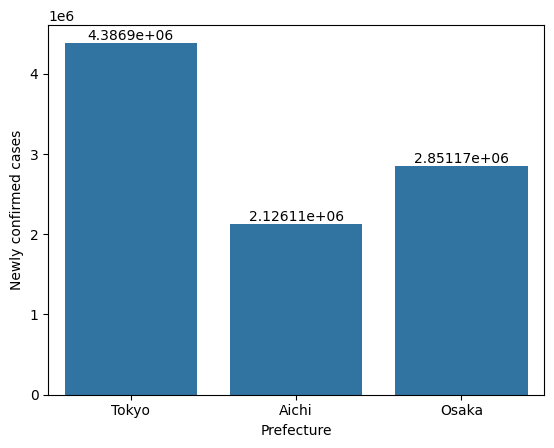

In [3]:
# minimum
import seaborn as sns
ax = sns.barplot(data=data,
                 x="Prefecture",
                 y="Newly confirmed cases",
                 estimator=sum,
                 errorbar=None)

ax.bar_label(ax.containers[0])


## Seaborn Objects

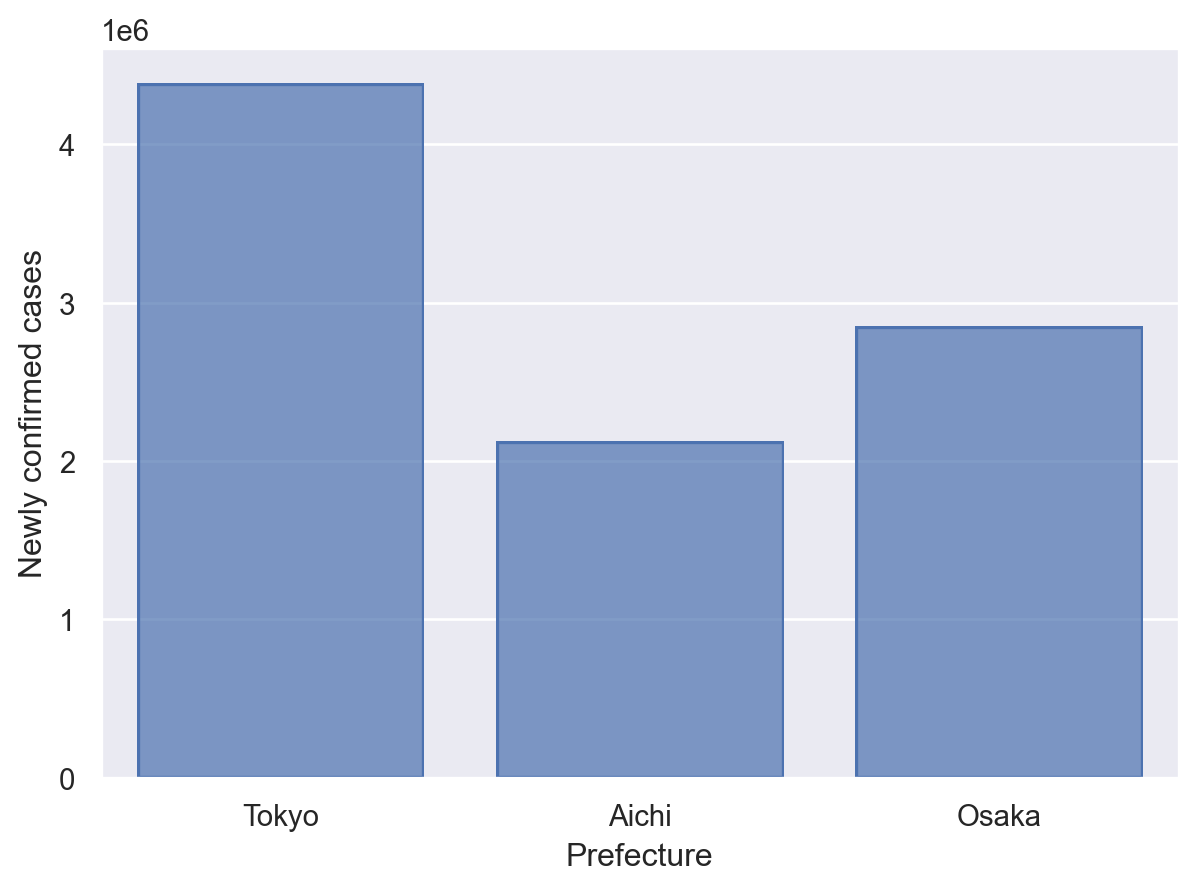

In [4]:
import seaborn.objects as so
so.Plot(data, x="Prefecture", y="Newly confirmed cases").add(so.Bar(), so.Agg("sum"))

## plotnine

グラフの上に値を描画する方法をようやく発見。難しすぎるのでは。

https://stackoverflow.com/questions/68770164/display-summary-statistics-in-barplot-using-ggplot-plotnine

今回は関係なかったが、こういうパターンもある

https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-show-counts-and-percentages-for-bar-plots.html

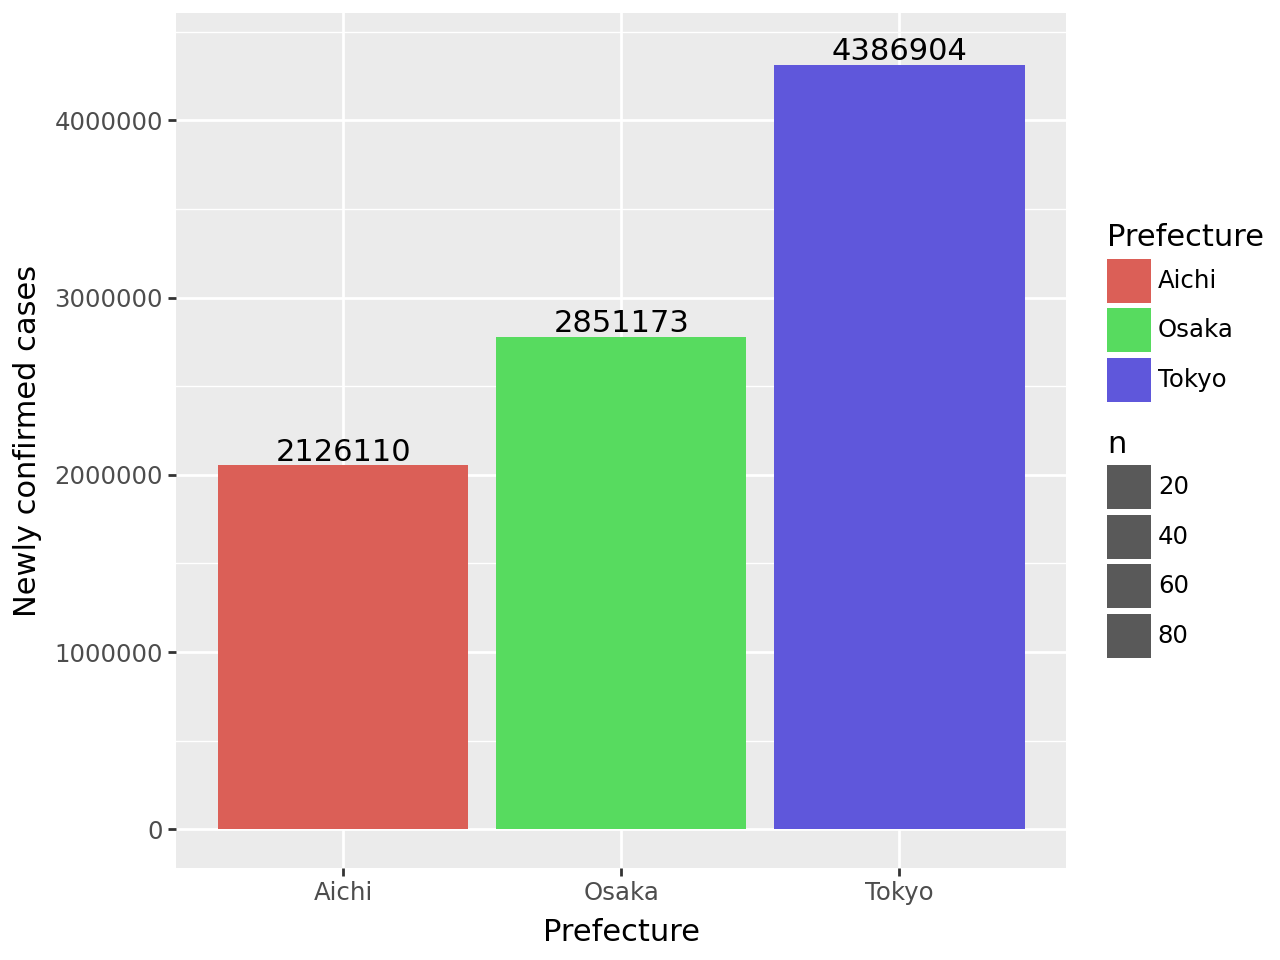

In [5]:
from plotnine import *

# データとプロット対象を指定
g = ggplot(data, aes(x="Prefecture", y='Newly confirmed cases', fill="Prefecture"))
# グラフの種類を指定
g += geom_bar(stat="sum")
g += stat_summary(aes(label ='stat(y)'), fun_y=sum, geom="text")
g #描画

集計済みデータからならこれくらいで描画可能だが、これはスマートでない…。

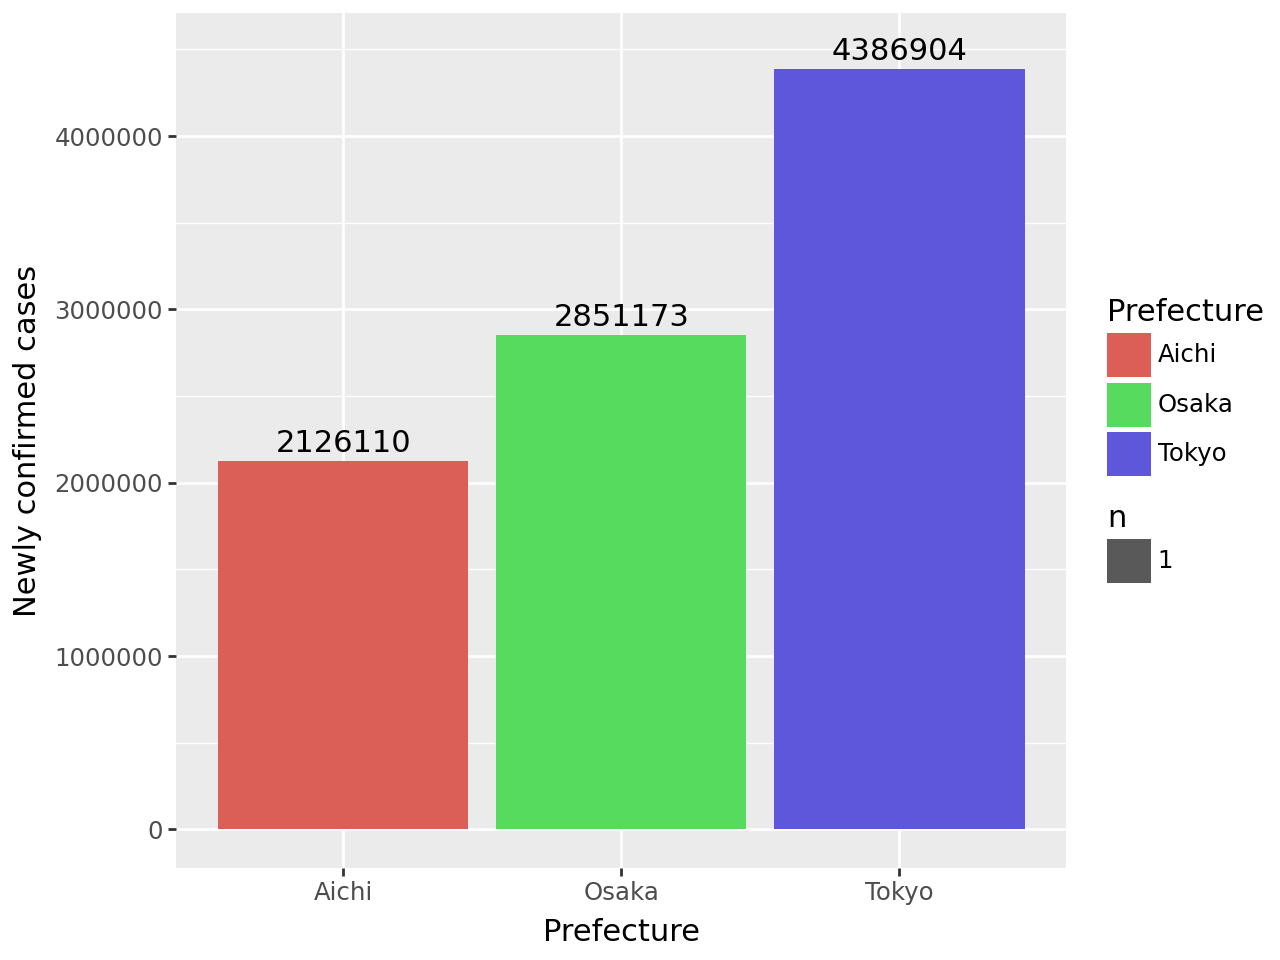

In [6]:
from plotnine import *

# データとプロット対象を指定
g = ggplot(data2, aes(x="Prefecture", y='Newly confirmed cases', fill="Prefecture"))
g += geom_bar(stat="sum")
g += geom_text(aes(label="Newly confirmed cases"), nudge_y=100000)
g #描画

# https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-show-counts-and-percentages-for-bar-plots.html

## Pandas 

backend が matplotlib なので Seaborn と同じ手が使える

[Text(0, 0, '2.12611e+06'),
 Text(0, 0, '2.85117e+06'),
 Text(0, 0, '4.3869e+06')]

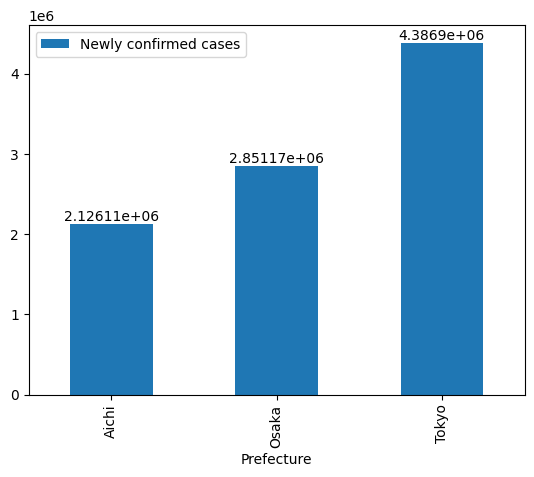

In [7]:
#minimum
ax = data2.plot.bar(x="Prefecture")
ax.bar_label(ax.containers[0])

## Plotly Express

ヒストグラムだとテキストで数値が置けない
棒グラフだとテキストが置けるが、縦持ちデータからの集計と組み合わせるのは難しそう

In [8]:
#minimum
import plotly.express as px
fig = px.histogram(data,
                   x = "Prefecture",
                   y = "Newly confirmed cases",
                   color = "Prefecture",
                   #text = "Newly confirmed cases"
                  )
fig.show()

In [9]:
#minimum
import plotly.express as px
fig = px.bar(data2,
             x = "Prefecture",
             y = "Newly confirmed cases",
             color = "Prefecture",
             text = "Newly confirmed cases"
            )
fig.show()

In [10]:
#minimum
import plotly.express as px
fig = px.bar(data,
             x = "Prefecture",
             y = "Newly confirmed cases",
             color = "Prefecture",
            )
fig.show()

## Altair

棒グラフとテキストを別々に作ってくっつける

In [11]:
#minimal
import altair as alt

alt.renderers.enable('html') # Notebook の Html保存に必要

alt.Chart(data).mark_bar().encode(
    x='Prefecture:N',
    y='sum(Newly confirmed cases):Q',
)

alt.Chart(...)

In [12]:
#minimal
import altair as alt

alt.renderers.enable('html') # Notebook の Html保存に必要

bars = alt.Chart(data).mark_bar().encode(
    x='Prefecture:N',
    y='sum(Newly confirmed cases):Q',
    color='Prefecture:N'
)

text = alt.Chart(data).mark_text(dy=10, color='white').encode(
    x='Prefecture:N',
    y='sum(Newly confirmed cases):Q',
    text='sum(Newly confirmed cases):Q'
)

alt.layer(
    bars,
    text
).properties(
    width=400,
    height=400
)


alt.LayerChart(...)

## HvPlot

holoview と組わせて数値も表示できるようだが、現状うまく行かない？
https://stackoverflow.com/questions/58900736/adding-value-labels-to-hvplot-bar

In [13]:
import hvplot.pandas 
# hv.extension('bokeh') #hvplot は bokeh しか使えないようだ
data2.hvplot.bar(x="Prefecture",
                 y="Newly confirmed cases",
                 width=500,
                 height=400,)

:Bars   [Prefecture]   (Newly confirmed cases)

In [14]:
import hvplot as hv
import hvplot.pandas 
hv.extension('plotly') 
data2.hvplot.bar(x="Prefecture",
                 y="Newly confirmed cases",
                 width=500,
                 height=400,)

:Bars   [Prefecture]   (Newly confirmed cases)

:Bars   [Prefecture]   (Newly confirmed cases)
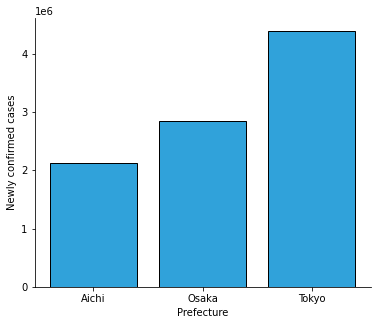

In [15]:
import hvplot.pandas 
hv.extension('maptplotlib') 
data2.hvplot.bar(x="Prefecture",
                 y="Newly confirmed cases",
                 width=500,
                 height=400,)